[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Mate_MercadosFinancieros/blob/main/Semana8_FastFourierTransform.ipynb)

# Predicción a Series de tiempo

Usaremos Prophet de Meta

Es una herramienta interesante, que combina analisis lineal y estacionalidad en series de tiempo. Tiene algunas ventajas como:

- Múltiples estacionalidades (no confundir con estacionariedad)
- Robusto a outliers y datos faltantes
- Refinable
- Rápido y medianamente preciso

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot, plot_yearly
import plotly.offline as py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('fivethirtyeight')

In [ ]:
asset_prices = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ['^SPX'],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "10y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close'].dropna()
asset_prices

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2014-09-08,2001.540039
2014-09-09,1988.439941
2014-09-10,1995.689941
2014-09-11,1997.449951
2014-09-12,1985.540039
...,...
2024-08-30,5648.399902
2024-09-03,5528.930176
2024-09-04,5520.069824


In [ ]:
asset_prices = pd.DataFrame(asset_prices).reset_index()
asset_prices

,Date,Adj Close
0,2014-09-08,2001.540039
1,2014-09-09,1988.439941
2,2014-09-10,1995.689941
3,2014-09-11,1997.449951
4,2014-09-12,1985.540039
...,...,...
2512,2024-08-30,5648.399902
2513,2024-09-03,5528.930176
2514,2024-09-04,5520.069824
2515,2024-09-05,5503.410156


In [ ]:
asset_prices = asset_prices.rename(columns={'Date': 'ds',
                        'Adj Close': 'y'})

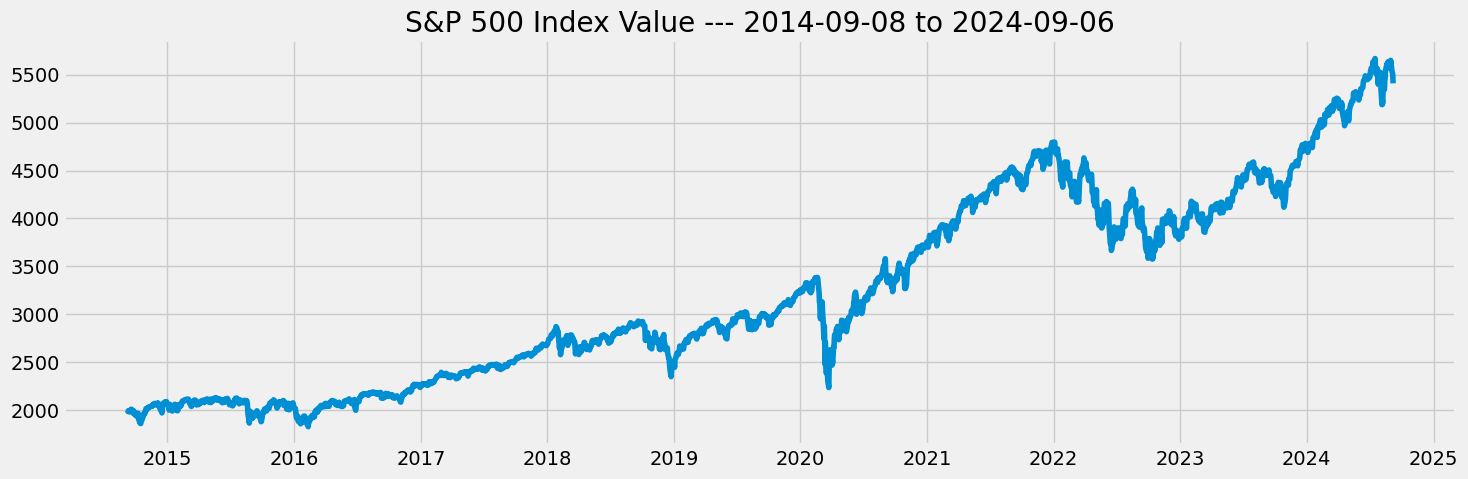

In [ ]:
plt.figure(figsize=(16,5))
plt.title("S&P 500 Index Value --- {} to {}".format(asset_prices['ds'].min().date(), asset_prices['ds'].max().date()))
plt.plot(asset_prices['ds'], asset_prices['y'])


¿Documentacion inconveniente?

In [ ]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None, scaling: str = 'absmax', holidays_mode=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_

In [ ]:
model1 = Prophet(interval_width=0.95)
model1.add_country_holidays(country_name='US')
model1.fit(asset_prices)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/tbsmqkvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/ilnmal0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29730', 'data', 'file=/tmp/tmp7q4niba3/tbsmqkvz.json', 'init=/tmp/tmp7q4niba3/ilnmal0r.json', 'output', 'file=/tmp/tmp7q4niba3/prophet_modelg2iasfwx/prophet_model-20240906234014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Despues preparamos un dataframe que albergará las predicciones. Para ver las posibles frecuencias revise [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [ ]:
future = model1.make_future_dataframe(periods=30, freq="B")
forecast = model1.predict(future)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (observed)', 'Christmas Day (observed)_lower',
       'Christmas Day (observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (observed)',
       'Independence Day (observed)_lower',
       'Independence Day (observed)_upper',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day_lower',
       'Juneteenth National Independence Day_upper',
       'Juneteenth National Independence Day (observed)',
       'Juneteenth National Independence Day (observed)_lower',
       'Juneteenth National Independence Day (observed)_upper', 'Labor Day',
       'Labor Day_lower', 'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Mart

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-08,2031.713939,1857.052191,2292.493105,2031.713939,2031.713939,0.0,0.0,0.0,0.0,...,8.278027,8.278027,8.278027,34.297820,34.297820,34.297820,0.0,0.0,0.0,2074.289785
1,2014-09-09,2031.815856,1839.965110,2290.883049,2031.815856,2031.815856,0.0,0.0,0.0,0.0,...,9.202730,9.202730,9.202730,28.793501,28.793501,28.793501,0.0,0.0,0.0,2069.812087
2,2014-09-10,2031.917773,1835.348751,2282.584696,2031.917773,2031.917773,0.0,0.0,0.0,0.0,...,7.394998,7.394998,7.394998,23.101356,23.101356,23.101356,0.0,0.0,0.0,2062.414127
3,2014-09-11,2032.019690,1809.535967,2294.727815,2032.019690,2032.019690,0.0,0.0,0.0,0.0,...,7.653747,7.653747,7.653747,17.268363,17.268363,17.268363,0.0,0.0,0.0,2056.941799
4,2014-09-12,2032.121607,1817.836397,2264.995018,2032.121607,2032.121607,0.0,0.0,0.0,0.0,...,8.821791,8.821791,8.821791,11.342302,11.342302,11.342302,0.0,0.0,0.0,2052.285700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2024-10-14,5500.271950,5196.042518,5660.960689,5477.545994,5520.280197,0.0,0.0,0.0,0.0,...,8.278027,8.278027,8.278027,-83.534811,-83.534811,-83.534811,0.0,0.0,0.0,5438.271654
2543,2024-10-15,5502.640279,5195.503486,5653.416805,5477.255713,5523.546226,0.0,0.0,0.0,0.0,...,9.202730,9.202730,9.202730,-83.362854,-83.362854,-83.362854,0.0,0.0,0.0,5428.480155
2544,2024-10-16,5505.008608,5191.902015,5648.997634,5478.497192,5526.807501,0.0,0.0,0.0,0.0,...,7.394998,7.394998,7.394998,-83.048892,-83.048892,-83.048892,0.0,0.0,0.0,5429.354714
2545,2024-10-17,5507.376937,5195.107602,5649.684915,5479.408430,5530.895739,0.0,0.0,0.0,0.0,...,7.653747,7.653747,7.653747,-82.585024,-82.585024,-82.585024,0.0,0.0,0.0,5432.445660


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2542,2024-10-14,5438.271654,5196.042518,5660.960689
2543,2024-10-15,5428.480155,5195.503486,5653.416805
2544,2024-10-16,5429.354714,5191.902015,5648.997634
2545,2024-10-17,5432.445660,5195.107602,5649.684915
2546,2024-10-18,5436.604557,5180.877775,5659.456392


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



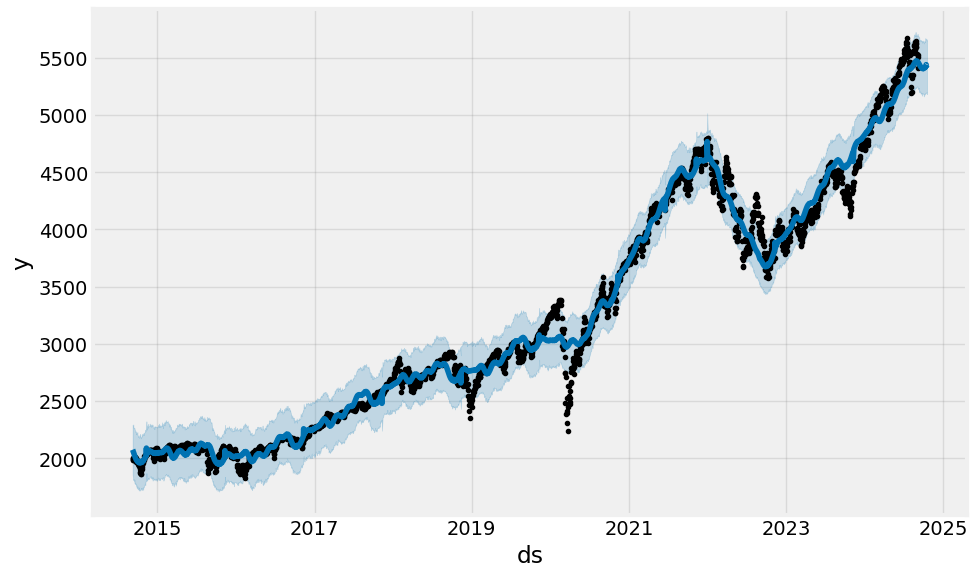

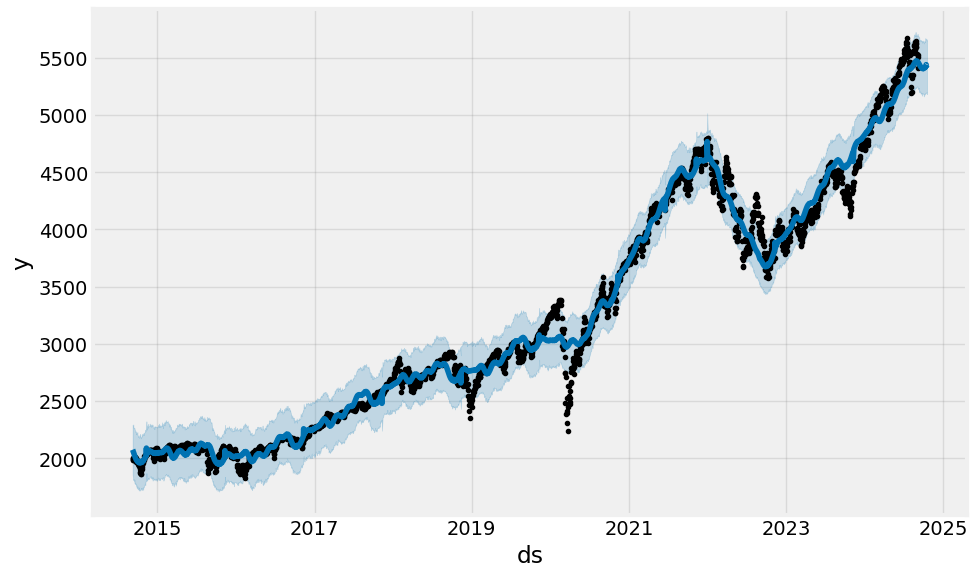

In [ ]:
model1.plot(forecast, uncertainty=True)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



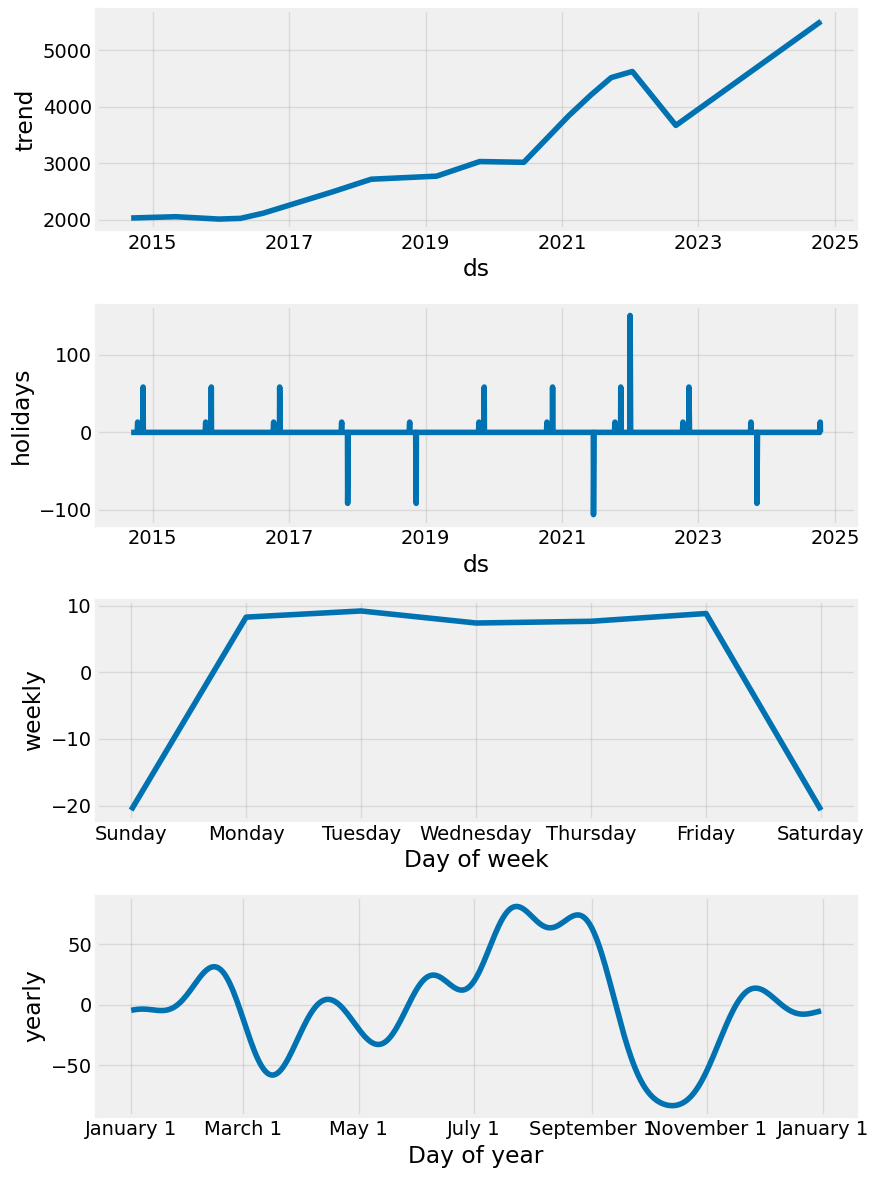

In [ ]:
fig = model1.plot_components(forecast)

Interpretación de las gráficas anteriores:

1.

2.

3.

4.

# Changepoints

Detección automática.

Prophet detecta puntos donde hay cambios de modo automático.

Por defecto, agrega 25 puntos con potencial de ser "changepoints" que se distribuyen en el primer 80% de los datos.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



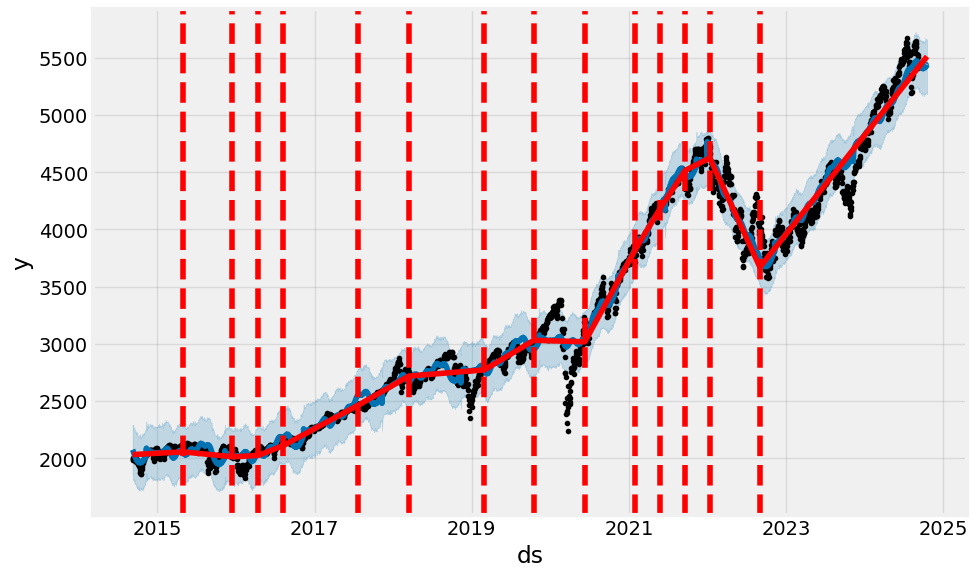

In [ ]:
fig = model1.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model1, forecast)

In [ ]:
model1.changepoints

,ds
80,2014-12-31
161,2015-04-29
241,2015-08-21
322,2015-12-16
402,2016-04-13
483,2016-08-08
563,2016-11-30
644,2017-03-29
724,2017-07-24
805,2017-11-15


# Ajustar flexibilidad de la tendencia (trend)

Podemos ajustarlo con el parámetro "changepoint_prior_scale" (por defecto es  0.05).

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/841vl5n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/z2t62fsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42347', 'data', 'file=/tmp/tmp7q4niba3/841vl5n9.json', 'init=/tmp/tmp7q4niba3/z2t62fsa.json', 'output', 'file=/tmp/tmp7q4niba3/prophet_modeljklvzjx7/prophet_model-20240906235818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:58:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in

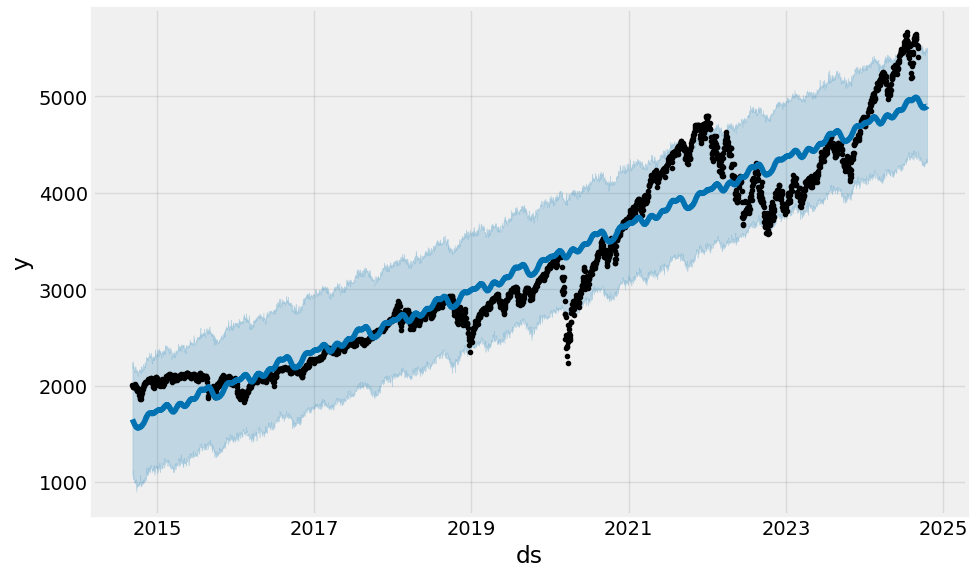

In [ ]:
model2 = Prophet(interval_width=0.95, changepoint_prior_scale=0.001)
model2.add_country_holidays(country_name='US')
forecast = model2.fit(asset_prices).predict(future)
fig = model2.plot(forecast)

# Ejercicio:
¿Como permitimos que haya mas "changepoints"? ¿Que hacen estos?
Grafique sus resultados

In [ ]:
# Espacio para ejercicio





# Estacionalidad temporal



El parámetro "seasonality_prior_scale" (default: 10) nos dice que tanto afectara la estacionalidad a nuestras predicciones.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/l4_16h7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/7d7a8qnj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17064', 'data', 'file=/tmp/tmp7q4niba3/l4_16h7r.json', 'init=/tmp/tmp7q4niba3/7d7a8qnj.json', 'output', 'file=/tmp/tmp7q4niba3/prophet_modelr90v2bq9/prophet_model-20240907000211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:02:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in

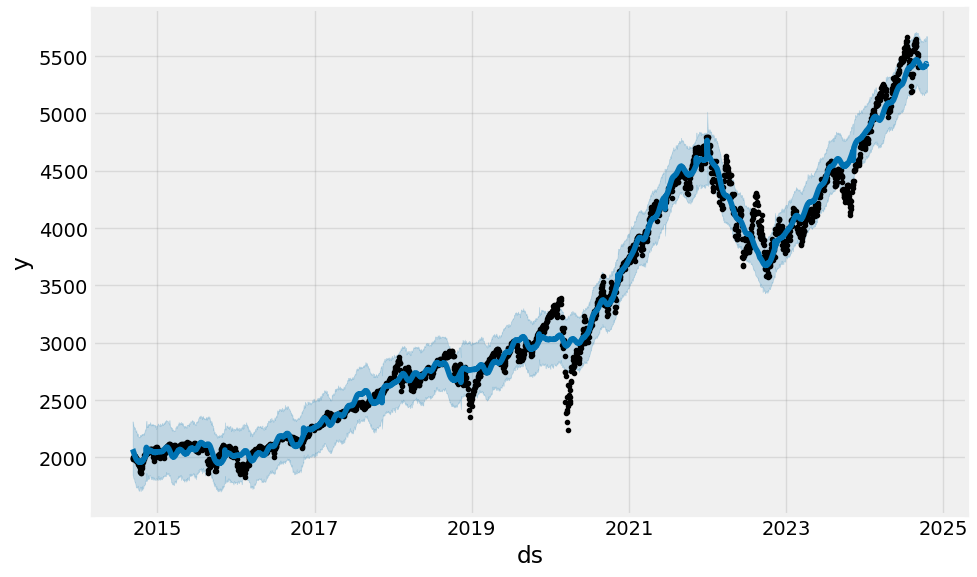

In [ ]:
model4 = Prophet(interval_width=0.95, seasonality_prior_scale=100)
model4.add_country_holidays(country_name='US')
forecast = model4.fit(asset_prices).predict(future)
fig = model4.plot(forecast)

Esté parámetro fue para afectar a todo el historial utilizando estacionalidad

Pero, ¿como podríamos solo quitar el efecto estacional anual y no el semanal?

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/3jwbku64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/ud081zgu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32174', 'data', 'file=/tmp/tmp7q4niba3/3jwbku64.json', 'init=/tmp/tmp7q4niba3/ud081zgu.json', 'output', 'file=/tmp/tmp7q4niba3/prophet_modelyt0rec4m/prophet_model-20240907000311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:03:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet

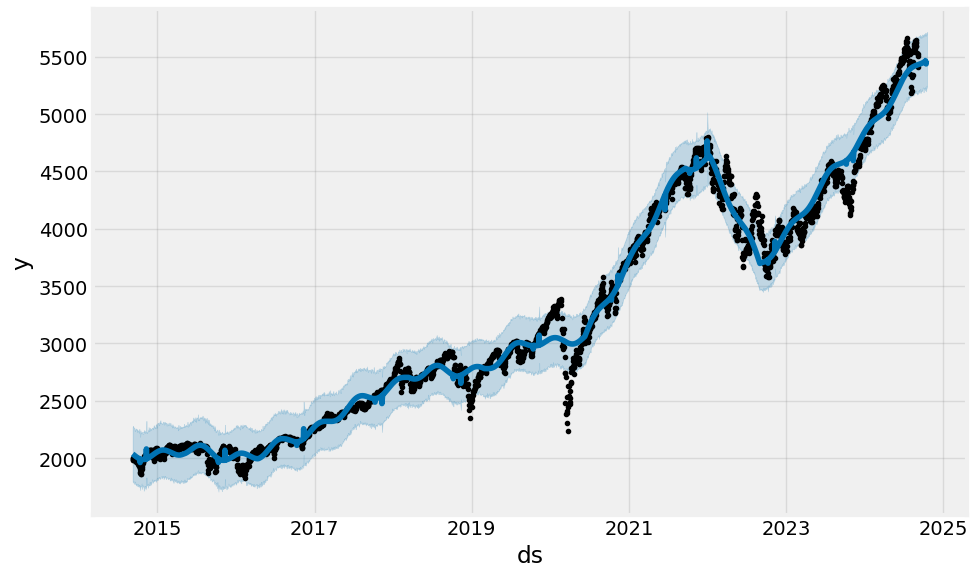

In [ ]:
model5 = Prophet(interval_width=0.95, weekly_seasonality=False)
model5.add_seasonality(name='yearly', period=365, fourier_order=2)
model5.add_country_holidays(country_name='US')
forecast = model5.fit(asset_prices).predict(future)
fig = model5.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



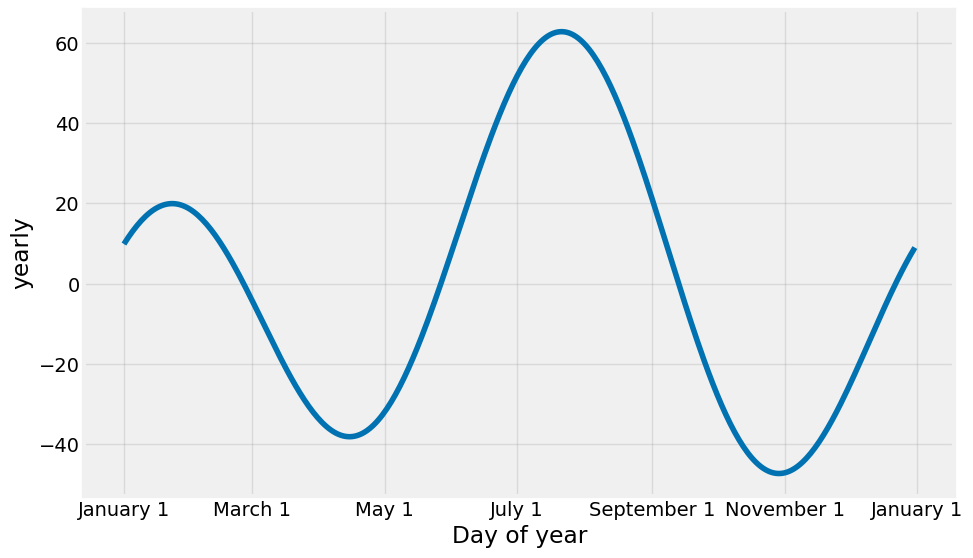

In [ ]:
fig = plot_yearly(model5)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/t_2tzzlp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7q4niba3/dwhaz6zu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72169', 'data', 'file=/tmp/tmp7q4niba3/t_2tzzlp.json', 'init=/tmp/tmp7q4niba3/dwhaz6zu.json', 'output', 'file=/tmp/tmp7q4niba3/prophet_modelha0kdwzx/prophet_model-20240907000414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet

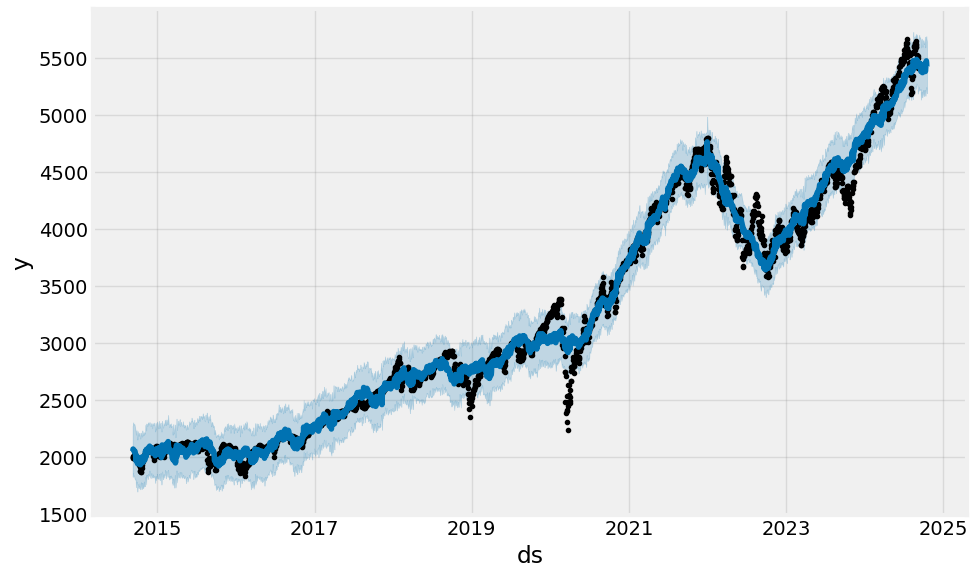

In [ ]:
model6 = Prophet(interval_width=0.95, weekly_seasonality=False)
model6.add_seasonality(name='yearly', period=365, fourier_order=100)
model6.add_country_holidays(country_name='US')
forecast = model6.fit(asset_prices).predict(future)
fig = model6.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



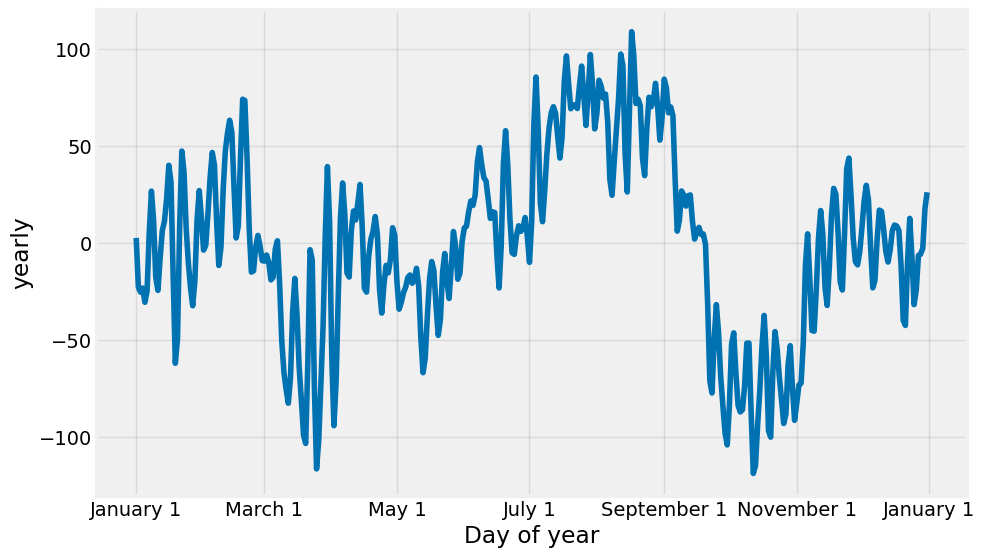

In [ ]:
fig = plot_yearly(model6)

¿Como afecta el parámetro de orden de Fourier?

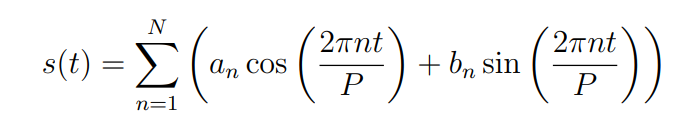

Ejemplo en el caso de que el orden sea 10 y la estacionariedad anual:

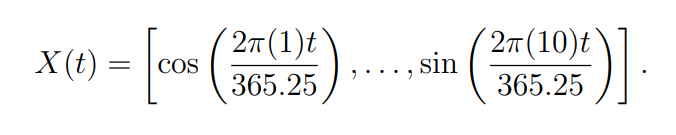

y se toma que

$$ s(t) = X(t)\beta $$
donde $\beta$ se distribuye como una normal $(0, \sigma^{2})$

- [Artículo en Medium](https://medium.com/@BrendanArtley/time-series-forecasting-with-prophet-a16dac63ddac)

- [Web de Prophet](https://facebook.github.io/prophet/)

- [Paper](https://peerj.com/preprints/3190/#)

# Ejercicio:

Realice un modelo de predicción para 2 activos, uno complejo (muy volatil, cambios en la media) y otro para algún activo con comportamiento mas regular.

In [ ]:
# Espacio para el ejercicio